In [149]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('mnist.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Separate features and labels 
X = df.drop(columns=['label'])
y = df['label'] 

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
pca = PCA(n_components=0.90)  # show the components that retain 90% of the variance
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [81]:
ncomponents = pca.n_components_
ncomponents


np.int64(193)

In [79]:
components = pca.components_
components

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [82]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.06196825, 0.04243746, 0.04044453, 0.0323059 , 0.02755073,
       0.02409125, 0.02045291, 0.01883155, 0.01670851, 0.01517525,
       0.01472084, 0.01310932, 0.01255181, 0.01194169, 0.01144925,
       0.01094969, 0.01031834, 0.00994036, 0.00946607, 0.00911548,
       0.00889483, 0.00865689, 0.0084711 , 0.00821634, 0.00786489,
       0.00770402, 0.00756605, 0.00733117, 0.00708816, 0.00683469,
       0.00668612, 0.00654195, 0.00647126, 0.0062203 , 0.00604145,
       0.00591891, 0.0058209 , 0.00573206, 0.00565633, 0.00552678,
       0.00551176, 0.00548062, 0.00533909, 0.00519627, 0.00512505,
       0.00499221, 0.00497984, 0.00489152, 0.0047877 , 0.00468935,
       0.00460459, 0.00454148, 0.00445849, 0.00440076, 0.00434004,
       0.0042364 , 0.00419579, 0.00414272, 0.00411608, 0.00405626,
       0.00400653, 0.00386531, 0.00381247, 0.0037537 , 0.00366449,
       0.00361093, 0.00356949, 0.00350286, 0.00346957, 0.00344178,
       0.00335664, 0.0033386 , 0.00330211, 0.00326756, 0.00323

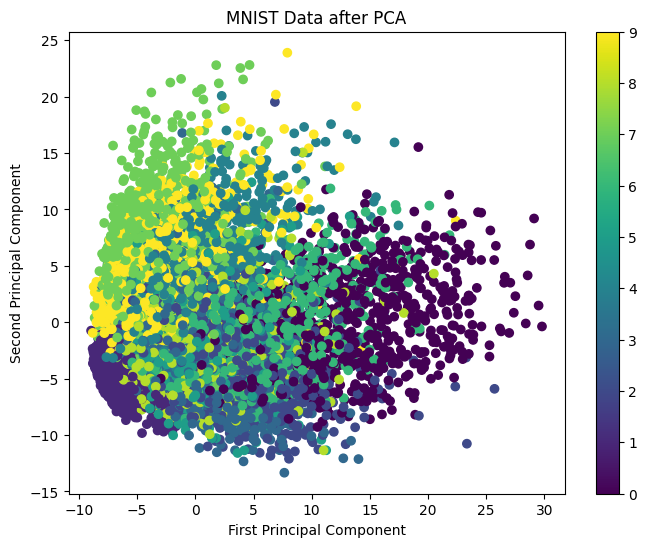

In [102]:
plt.figure(figsize=(8, 6)) 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 
plt.title('MNIST Data after PCA') 
plt.colorbar() 

### Try to improve

In [127]:
pca1 = PCA(n_components=0.90)  
pca1.fit(X_scaled)
X_pca1 = pca1.transform(X_scaled)

In [128]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [129]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

c:\Users\elige\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [130]:
preds = lr.predict(xtest)

In [131]:
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       247
           1       0.98      0.97      0.98       285
           2       0.90      0.85      0.88       266
           3       0.88      0.88      0.88       256
           4       0.87      0.85      0.86       261
           5       0.78      0.80      0.79       204
           6       0.89      0.90      0.89       248
           7       0.85      0.92      0.88       238
           8       0.82      0.82      0.82       239
           9       0.83      0.86      0.85       256

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



In [138]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pca1, y, test_size=0.25, random_state=42)

In [139]:
lr_pca = LogisticRegression()
lr_pca.fit(xtrain, ytrain)

c:\Users\elige\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
preds = lr_pca.predict(xtest)

In [141]:
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       247
           1       0.95      0.96      0.96       285
           2       0.91      0.85      0.88       266
           3       0.89      0.89      0.89       256
           4       0.89      0.90      0.90       261
           5       0.83      0.83      0.83       204
           6       0.91      0.95      0.93       248
           7       0.88      0.94      0.91       238
           8       0.89      0.83      0.86       239
           9       0.87      0.89      0.88       256

    accuracy                           0.90      2500
   macro avg       0.90      0.90      0.90      2500
weighted avg       0.90      0.90      0.90      2500



In [142]:
param_grid = { 
    'C': [0.01, 0.1, 1, 10, 100], #This parameter is the inverse of regularization strength. Lower values of C imply stronger regularization (technique used to prevent overfitting) 
    'solver': ['liblinear', 'lbfgs'] # specifies the algorithm to be used for optimization small and large datasets
    } 


grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5) 
grid_search.fit(xtrain, ytrain) 
best_params = grid_search.best_params_

In [144]:
best_params

{'C': 0.01, 'solver': 'lbfgs'}

In [145]:
lr_best = LogisticRegression(max_iter=1000, **best_params) 
lr_best.fit(xtrain, ytrain) 

LogisticRegression(C=0.01, max_iter=1000)

In [146]:
best_preds = lr_best.predict(xtest)

In [147]:
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       247
           1       0.95      0.96      0.96       285
           2       0.91      0.85      0.88       266
           3       0.89      0.89      0.89       256
           4       0.89      0.90      0.90       261
           5       0.83      0.83      0.83       204
           6       0.91      0.95      0.93       248
           7       0.88      0.94      0.91       238
           8       0.89      0.83      0.86       239
           9       0.87      0.89      0.88       256

    accuracy                           0.90      2500
   macro avg       0.90      0.90      0.90      2500
weighted avg       0.90      0.90      0.90      2500



observation: no improvement

In [150]:
# Variance thresholds to explore 
variance_thresholds = [0.85, 0.90, 0.95] 
results = []


# experiment with different thresholds for variance retention
for variance_threshold in variance_thresholds: 
     pca = PCA(n_components=variance_threshold) 
     pca.fit(X_scaled)
     X_pca = pca.transform(X_scaled)


     xtrain, xtest, ytrain, ytest = train_test_split(X_pca, y, test_size=0.25, random_state=42)

     #Logistic Regression
     lr = LogisticRegression(max_iter=1000) 
     lr.fit(xtrain, ytrain) 
     
     lr_preds = lr.predict(xtest) 
     lr_report = classification_report(ytest, lr_preds, output_dict=True)

     # Random Forest 
     rf = RandomForestClassifier(n_estimators=100, random_state=42) 
     rf.fit(xtrain, ytrain) 
     
     rf_preds = rf.predict(xtest) 
     rf_report = classification_report(ytest, rf_preds, output_dict=True)


     # Store results 
     results.append({ 
          'variance_threshold': variance_threshold, 
          'lr_report': lr_report, 
          'rf_report': rf_report 
          })
     
     for result in results: 
          print(f"Variance Threshold: {result['variance_threshold']}") 
          print("Logistic Regression Classification Report:") 
          print(classification_report(ytest, lr_preds)) 
          print("\nRandom Forest Classification Report:") 
          print(classification_report(ytest, rf_preds)) 
          print("="*60)

Variance Threshold: 0.85
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       247
           1       0.97      0.98      0.97       285
           2       0.91      0.85      0.88       266
           3       0.91      0.89      0.90       256
           4       0.90      0.89      0.89       261
           5       0.84      0.84      0.84       204
           6       0.90      0.93      0.91       248
           7       0.88      0.93      0.90       238
           8       0.86      0.85      0.85       239
           9       0.87      0.89      0.88       256

    accuracy                           0.90      2500
   macro avg       0.90      0.90      0.90      2500
weighted avg       0.90      0.90      0.90      2500


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       247
           1       0.99   